#Module 5 Challenge



 

In [17]:
#Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

Mouse_metadata_path = "/Users/paulsalgo/Desktop/Module 5 Starter Code/Pymaceuticals/data/Mouse_metadata.csv"
Study_results_path = "/Users/paulsalgo/Desktop/Module 5 Starter Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data
Mouse_metadata = pd.read_csv(Mouse_metadata_path)
Study_results = pd.read_csv(Study_results_path)

# merge the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [18]:
# Checking the number of mice.
num_mice = merged_data["Mouse ID"].nunique()
print(f"The number of unique mice: {num_mice}")

The number of unique mice: 249


In [19]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Identify duplicate rows based on "Mouse ID" and "Timepoint"
duplicate_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Count the number of duplicate rows
num_duplicate_mice = len(duplicate_mice)

# Display the duplicate rows and the number of duplicate mice
print("Duplicate Mice based on Mouse ID and Timepoint:")
print(duplicate_mice)
print(f"\nThe number of duplicate mice is: {num_duplicate_mice}")


Duplicate Mice based on Mouse ID and Timepoint:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801    

In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice_data = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Display all data for duplicate mouse IDs
print("All data for Duplicate Mouse IDs based on Mouse ID and Timepoint:")
print(all_duplicate_mice_data)


All data for Duplicate Mouse IDs based on Mouse ID and Timepoint:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910      

In [22]:
# # Filter the merged DataFrame to get all data for duplicate mouse IDs
all_duplicate_mice_data = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Display all data for duplicate mouse IDs
print("All data for Duplicate Mouse IDs based on Mouse ID and Timepoint:")
print(all_duplicate_mice_data)



All data for Duplicate Mouse IDs based on Mouse ID and Timepoint:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910      

In [23]:
# Checking the number of mice in the clean DataFrame.
cleaned_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])

# Count the number of unique mice in the cleaned DataFrame
num_mice_cleaned = cleaned_data["Mouse ID"].nunique()


print(f"The number of unique mice in the cleaned DataFrame is: {num_mice_cleaned}")


The number of unique mice in the cleaned DataFrame is: 249


## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_data = cleaned_data.groupby("Drug Regimen")

# Calculate summary statistics for tumor volume
summary_statistics = grouped_data["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

print("Summary Statistics for Tumor Volume by Drug Regimen:")
print(summary_statistics)


Summary Statistics for Tumor Volume by Drug Regimen:
                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

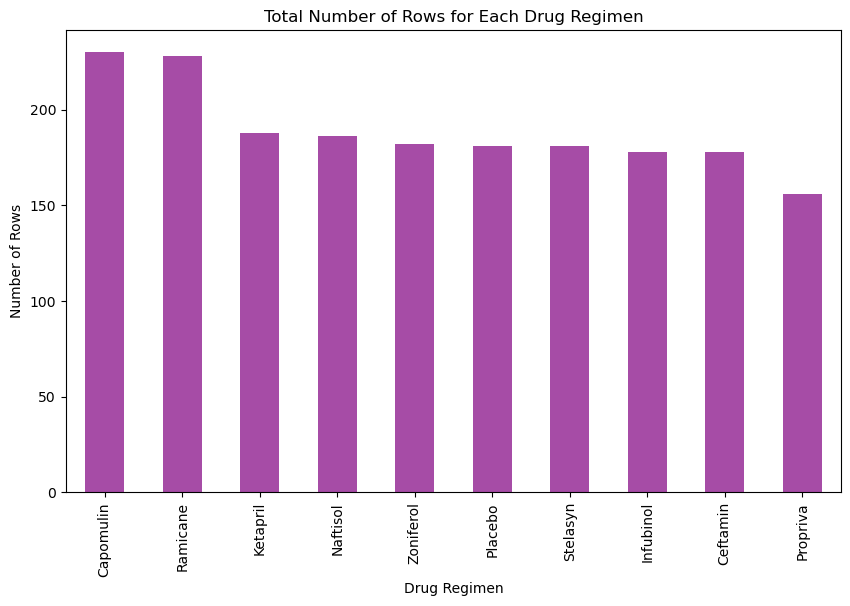

In [40]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Count the number of rows for each drug regimen
drug_regimen_counts = cleaned_data["Drug Regimen"].value_counts()

drug_regimen_counts.plot(kind='bar', color='purple', alpha=0.7, figsize=(10, 6))
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

plt.show()


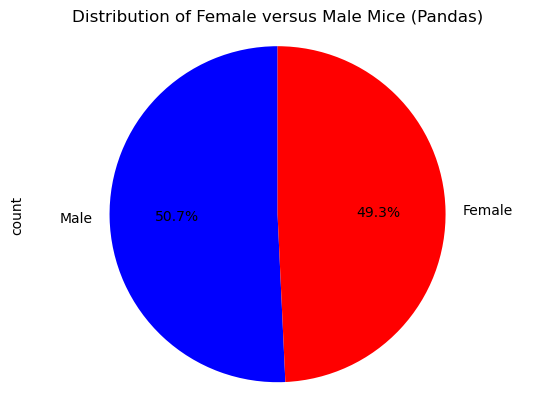

In [38]:
# Count the number of male and female mice
gender_distribution = cleaned_data["Sex"].value_counts()

# Plot with Pandas DataFrame.plot()
gender_distribution.plot.pie(autopct='%1.1f%%', colors=['blue', 'red'], startangle=90)
plt.title('Distribution of Female versus Male Mice (Pandas)')
plt.axis('equal')  # pie is drawn as a circle

plt.show()




In [33]:
#PYPLOT


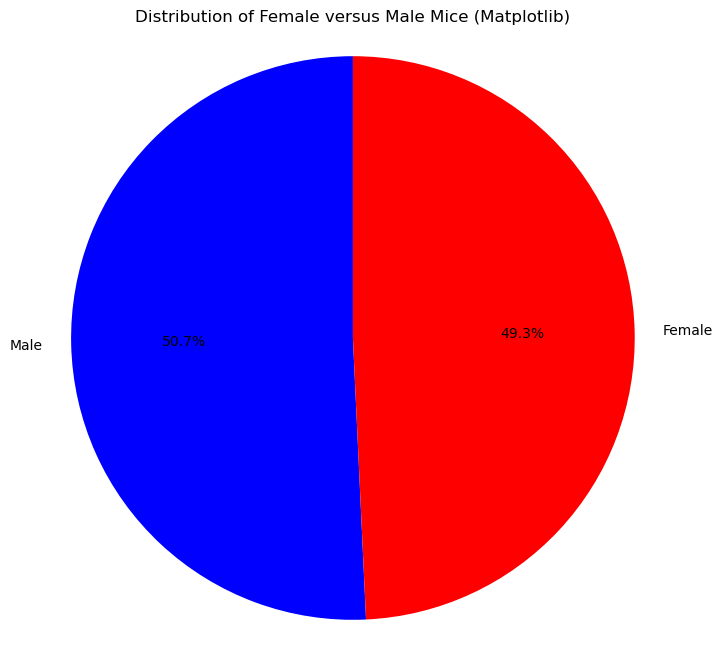

In [37]:
# Count the number of male and female mice
gender_distribution = cleaned_data["Sex"].value_counts()

#pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['blue', 'red'], startangle=90)
plt.title('Distribution of Female versus Male Mice (Matplotlib)')
plt.axis('equal')  # pie is drawn as a circle

plt.show()


## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
###########blah

# Step 1: Create a grouped DataFrame that shows the greatest time point for each mouse
last_timepoint_df = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Step 2: Merge the grouped DataFrame with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoint_df = pd.merge(last_timepoint_df, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

# Step 3: Create a list that holds the treatment names and an empty list to hold the tumor volume data
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = []

# Step 4: Loop through each drug in the treatment list 
for drug in treatments:
    drug_data = merged_last_timepoint_df.loc[merged_last_timepoint_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    final_tumor_volumes.append(drug_data)

# Step 5: Determine outliers using the upper and lower bounds, and print the results
for i in range(len(treatments)):
    quartiles = final_tumor_volumes[i].quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    outliers = final_tumor_volumes[i][(final_tumor_volumes[i] < lower_bound) | (final_tumor_volumes[i] > upper_bound)]
    
    print(f"Results for {treatments[i]}:")
    print(f"  - Lower Quartile: {lower_q}")
    print(f"  - Upper Quartile: {upper_q}")
    print(f"  - IQR: {iqr}")
    print(f"  - Lower Bound: {lower_bound}")
    print(f"  - Upper Bound: {upper_bound}")
    print(f"  - Potential Outliers: {outliers.tolist()}")
    print("\n")




Results for Capomulin:
  - Lower Quartile: 32.37735684
  - Upper Quartile: 40.1592203
  - IQR: 7.781863460000004
  - Lower Bound: 20.70456164999999
  - Upper Bound: 51.83201549
  - No potential outliers found.


Results for Ramicane:
  - Lower Quartile: 31.56046955
  - Upper Quartile: 40.65900627
  - IQR: 9.098536719999998
  - Lower Bound: 17.912664470000003
  - Upper Bound: 54.30681135
  - No potential outliers found.


Results for Infubinol:
  - Lower Quartile: 54.04860769
  - Upper Quartile: 65.52574285
  - IQR: 11.477135160000003
  - Lower Bound: 36.83290494999999
  - Upper Bound: 82.74144559000001
  - Potential Outliers: [36.3213458]


Results for Ceftamin:
  - Lower Quartile: 48.72207785
  - Upper Quartile: 64.29983003
  - IQR: 15.577752179999997
  - Lower Bound: 25.355449580000002
  - Upper Bound: 87.66645829999999
  - No potential outliers found.




In [49]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    
    #########




treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


tumor_volume_data = []


for drug in treatments:
   
    tumor_volumes = cleaned_data.loc[cleaned_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
  
    tumor_volume_data.append(tumor_volumes)
    
   
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"Results for {drug}:")
    print(f"  - Lower Quartile: {lower_q}")
    print(f"  - Upper Quartile: {upper_q}")
    print(f"  - IQR: {iqr}")
    print(f"  - Lower Bound: {lower_bound}")
    print(f"  - Upper Bound: {upper_bound}")
    
    if outliers.empty:
        print("  - No potential outliers found.")
    else:
        print(f"  - Potential Outliers: {outliers.tolist()}")
    
    print("\n")





Results for Capomulin:
  - Lower Quartile: 37.685932865
  - Upper Quartile: 45.0
  - IQR: 7.314067135000002
  - Lower Bound: 26.714832162499995
  - Upper Bound: 55.9711007025
  - Potential Outliers: [25.47214326, 23.34359787]


Results for Ramicane:
  - Lower Quartile: 36.674634585
  - Upper Quartile: 45.0
  - IQR: 8.325365415
  - Lower Bound: 24.1865864625
  - Upper Bound: 57.488048122500004
  - Potential Outliers: [22.05012627]


Results for Infubinol:
  - Lower Quartile: 47.3123533
  - Upper Quartile: 57.314443967500004
  - IQR: 10.002090667500006
  - Lower Bound: 32.309217298749985
  - Upper Bound: 72.31757996875001
  - No potential outliers found.


Results for Ceftamin:
  - Lower Quartile: 47.2084271125
  - Upper Quartile: 56.801437570000004
  - IQR: 9.593010457500007
  - Lower Bound: 32.81891142624998
  - Upper Bound: 71.19095325625001
  - No potential outliers found.




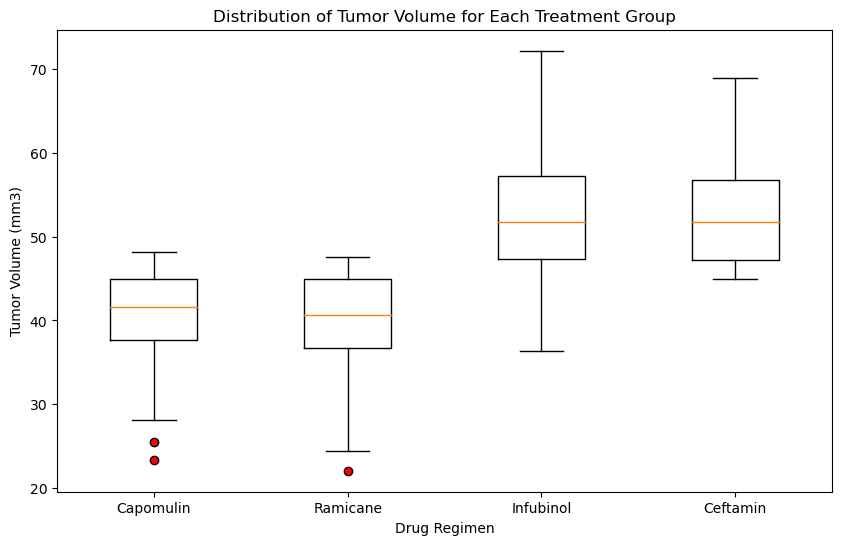

In [50]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(markerfacecolor='red', marker='o'))

# Add labels and title
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()

## Line and Scatter Plots

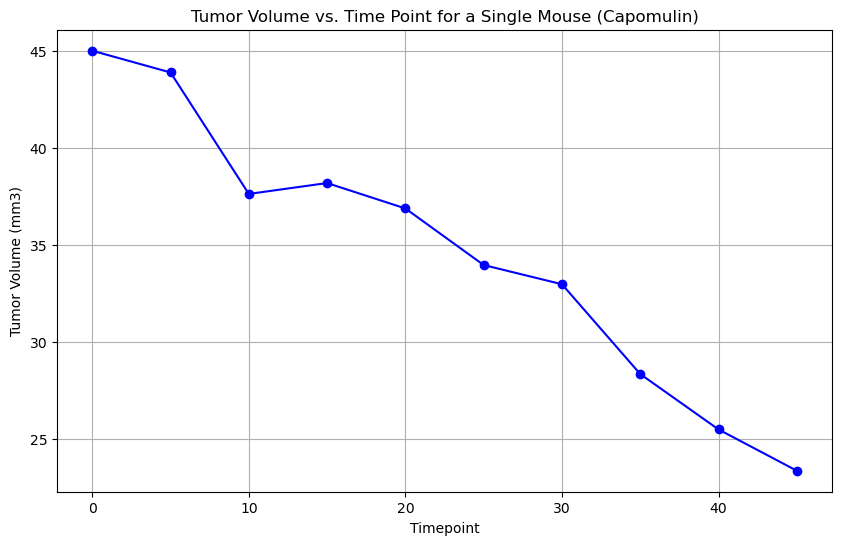

In [61]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomuli
capomulin_mouse = cleaned_data.loc[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == 's185')]

# Generate a line plot of tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'], marker='o', color='blue')
plt.title('Tumor Volume vs. Time Point for a Single Mouse (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()




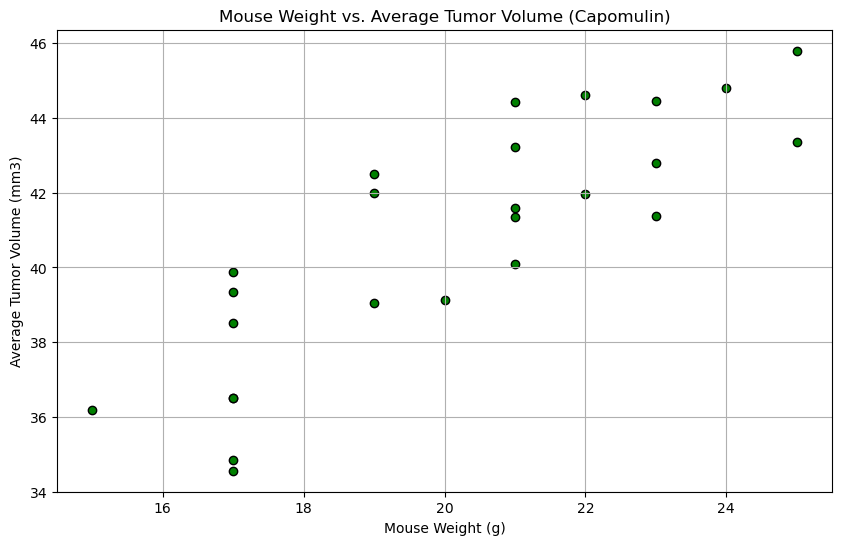

In [60]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tumor_volume, color='green', edgecolors='black')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

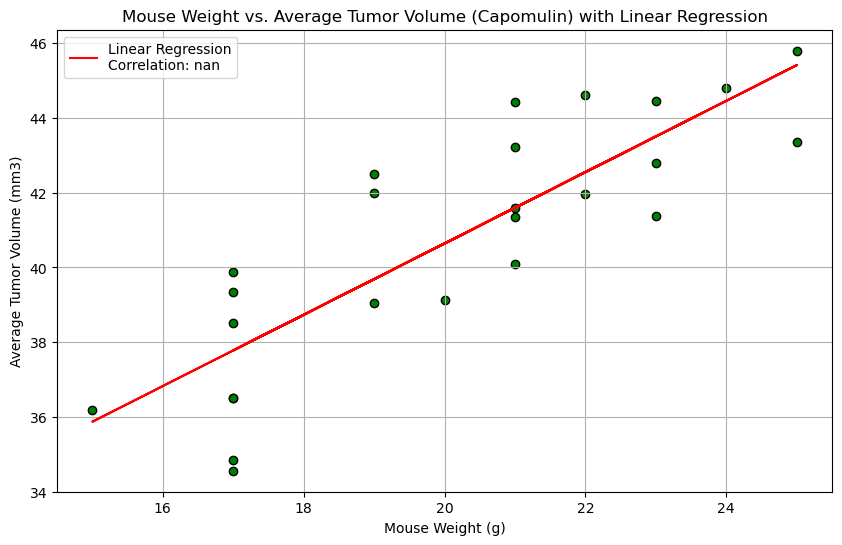

In [65]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress
correlation_coefficient = capomulin_data['Weight (g)'].corr(capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())

slope, intercept, rvalue, pvalue, stderr = linregress(mouse_weight, avg_tumor_volume)

regression_line = slope * mouse_weight + intercept

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tumor_volume, color='green', edgecolors='black')
plt.plot(mouse_weight, regression_line, color='red', label=f'Linear Regression\nCorrelation: {correlation_coefficient:.2f}')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin) with Linear Regression')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()

